In [86]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

df = pd.read_pickle("./full_dataset.pkl")
# rap_df = pd.read_pickle("./rap_songs_embeddings.pkl")
# techno_df = pd.read_pickle("./techno_dataset.pkl")
# df = pd.concat([df, rap_df, techno_df])
df.shape

(1414, 5)

In [87]:
df.band.value_counts()

ACDC               158
Iron Maiden        152
Metallica          121
Eminem             108
Boris Brejcha       97
Wiz Khalifa         96
Kendrick Lamar      88
Future              81
ScHoolboy Q         76
Guns N' Roses       75
Michael Jackson     69
A$AP Rocky          65
Britney Spears      56
Taylor Swift        46
Justin Bieber       36
Mariah Carey        31
Madonna             30
Van Halen           29
Name: band, dtype: int64

In [88]:
df.head()

,index,filename,embedding,band,song
0,0,data/guess-the-song/ACDC/Little Lover.mp3,"[tensor(36.4139), tensor(15.8792), tensor(4.02...",ACDC,Little Lover.mp3
1,1,data/guess-the-song/ACDC/Can I Sit Next to You...,"[tensor(16.5327), tensor(6.2954), tensor(-17.5...",ACDC,Can I Sit Next to You Girl.mp3
2,2,data/guess-the-song/ACDC/Shot of Love.mp3,"[tensor(33.0472), tensor(19.0865), tensor(-16....",ACDC,Shot of Love.mp3
3,3,data/guess-the-song/ACDC/Cover You in Oil.mp3,"[tensor(40.7268), tensor(17.6238), tensor(0.21...",ACDC,Cover You in Oil.mp3
4,4,data/guess-the-song/ACDC/Whole Lotta Rosie.mp3,"[tensor(-12.3743), tensor(15.9797), tensor(-41...",ACDC,Whole Lotta Rosie.mp3


In [89]:
rap_bands = [
    "Wiz Khalifa", "Eminem", "Future",
    "ScHoolboy Q", "A$AP Rocky", "Kendrick Lamar"
]

rock_bands = [
    "Metallica", "Iron Maiden", "Guns N' Roses",
    "Van Halen", "ACDC"
]

def get_genre(band):
    if band in rock_bands:
        return "rock"
    elif band in rap_bands:
        return "rap"
    return "unknown"

df["genre"] = df["band"].apply(get_genre)
df["genre"].value_counts()

rock       535
rap        514
unknown    365
Name: genre, dtype: int64

In [90]:
X = [i.unsqueeze(0) for i in df["embedding"]]
X = torch.vstack(X)
X.shape

torch.Size([1414, 192])

In [91]:
# X = np.array(df["embedding"])
label = "band"
# label = "genre"
y = df[label]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', metric="cosine", verbose=1, 
            learning_rate="auto", square_distances=True)
X_2d = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1414 samples in 0.000s...
[t-SNE] Computed neighbors for 1414 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1414
[t-SNE] Computed conditional probabilities for sample 1414 / 1414
[t-SNE] Mean sigma: 0.096578


/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.378586
[t-SNE] KL divergence after 1000 iterations: 1.052117


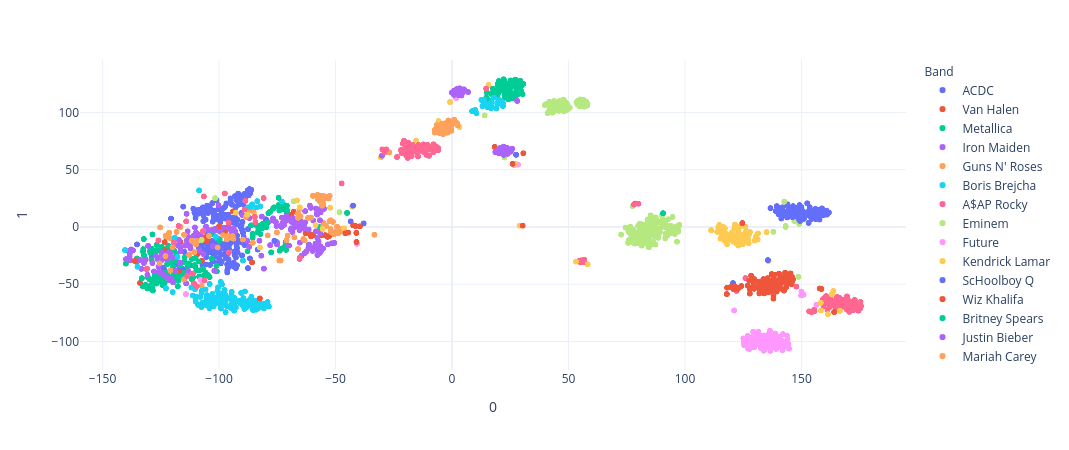

In [92]:
import plotly.express as px


fig = px.scatter(
    X_2d, x=0, y=1,
    color=df[label], labels={'color': 'Band'},
)
fig.show()

3d

In [93]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, init='pca', metric="cosine", verbose=1, 
            learning_rate="auto")
X_3d = tsne.fit_transform(X)
X_3d

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1414 samples in 0.000s...
[t-SNE] Computed neighbors for 1414 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1414
[t-SNE] Computed conditional probabilities for sample 1414 / 1414
[t-SNE] Mean sigma: 0.163240
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.433807
[t-SNE] KL divergence after 1000 iterations: 1.372566


array([[ -95.22431 ,   46.173363,    4.064201],
       [ -75.503716,  -28.365356,   22.158377],
       [-117.91679 ,   16.999832,    6.364009],
       ...,
       [  38.00964 ,   85.1425  ,  -58.01266 ],
       [  28.944838,   75.5656  ,  -43.444466],
       [  39.653435,   98.981   ,  -41.46855 ]], dtype=float32)

In [94]:
# df[""]
df
# del df["index"]
df.to_pickle("full_dataset.pkl")
# pd.read_pickle("teste.pkl").reset_index(drop=True)

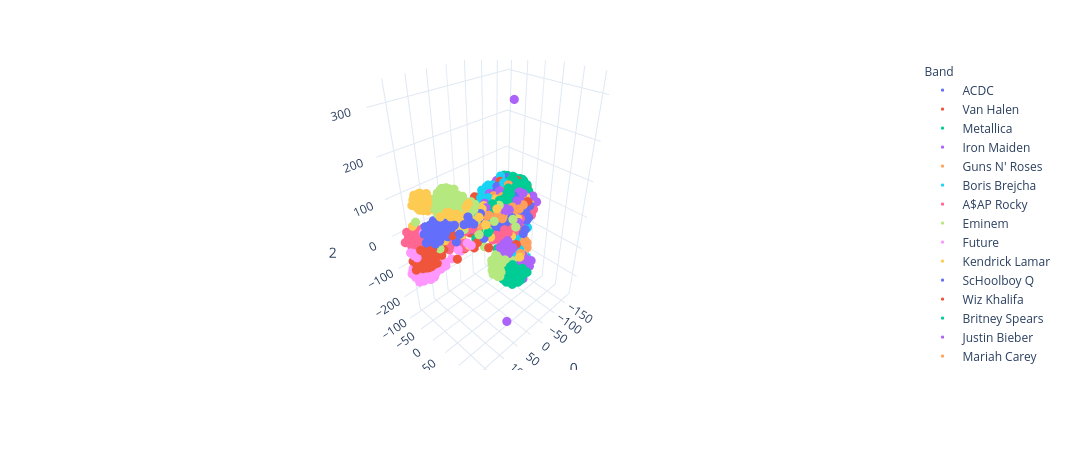

In [95]:
fig = px.scatter_3d(
    X_3d, x=0, y=1, z=2,
    color=df[label], labels={'color': 'Band'},
)
fig.update_traces(marker_size=3)

fig.show()

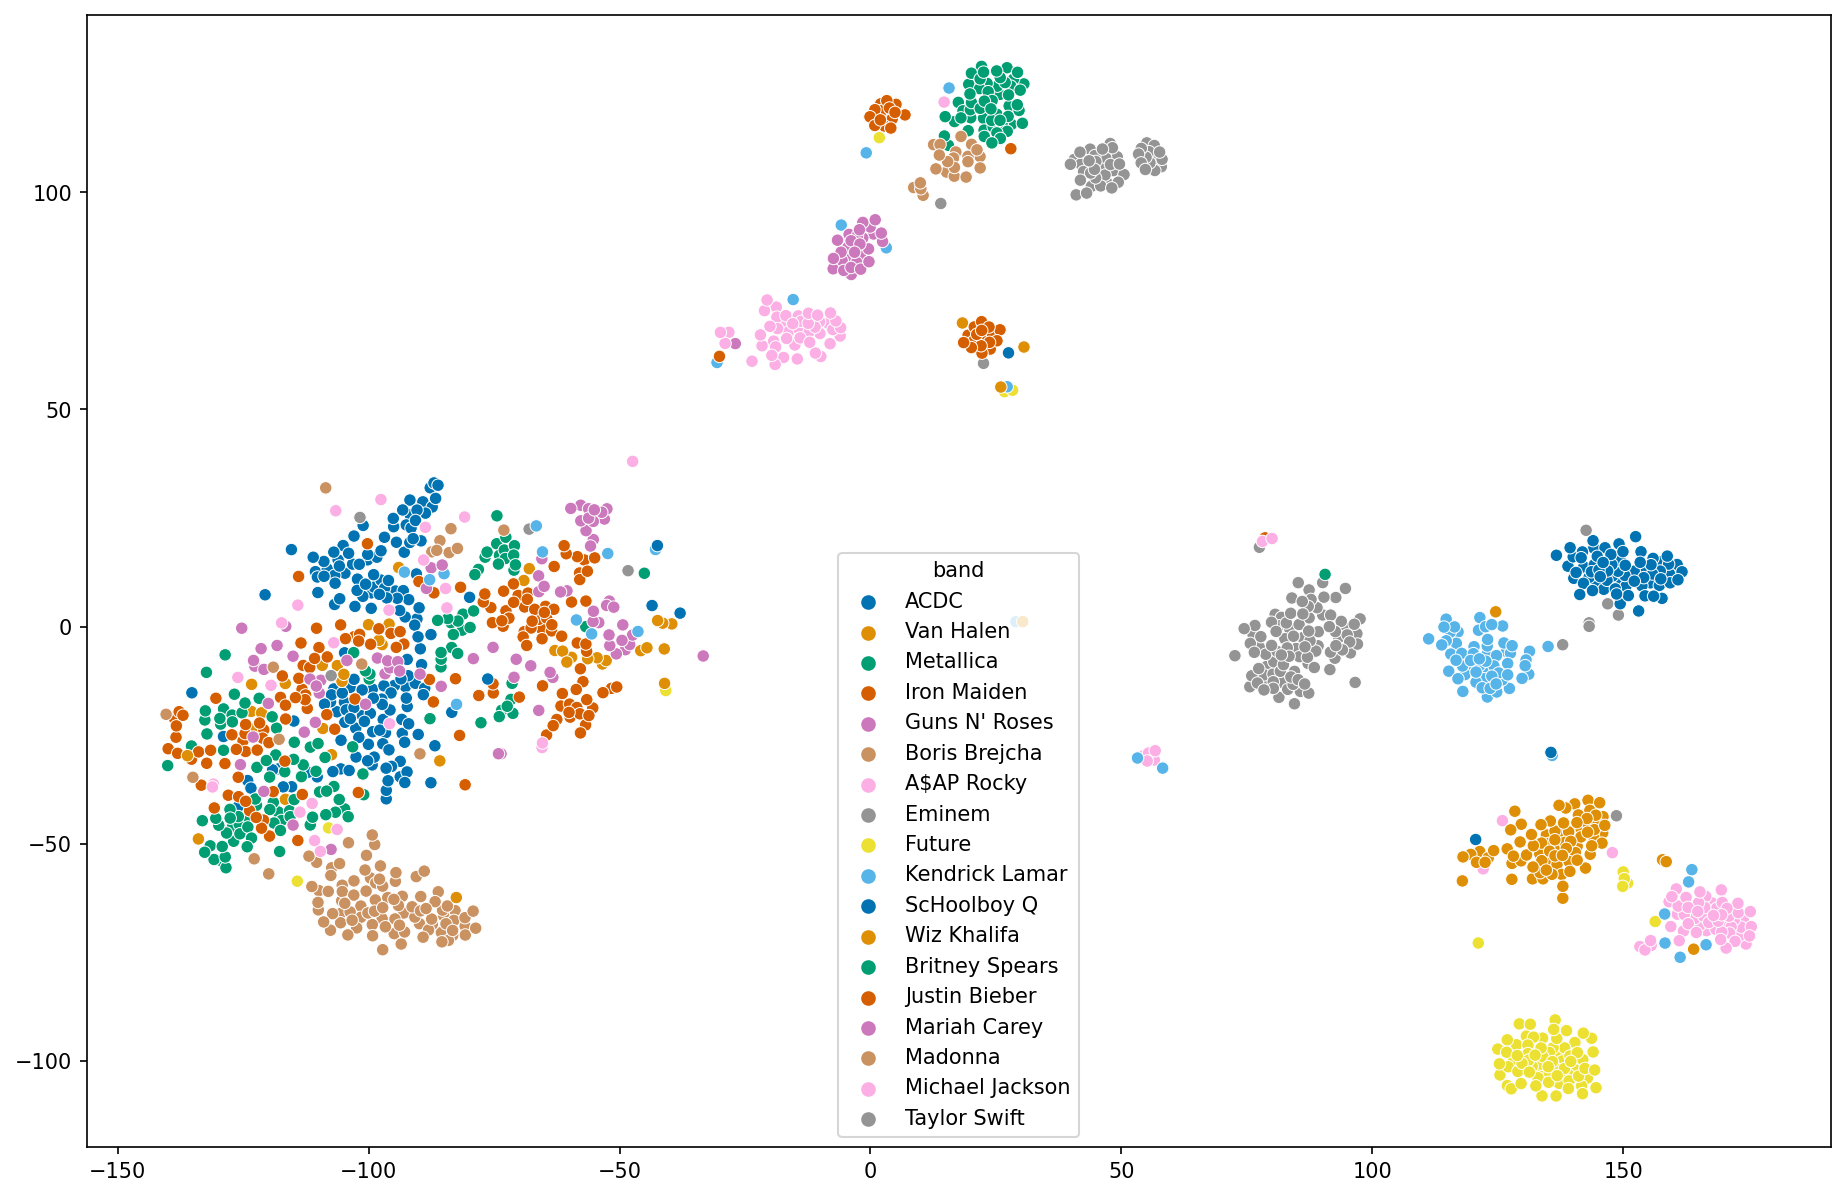

In [96]:
import seaborn as sns

plt.figure(dpi=150, figsize=(15, 10))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=df[label], 
                legend="full", palette=sns.color_palette("colorblind", df[label].unique().size))
plt.savefig("tsne_bands.png", dpi=120)